# scRNAseq_keloid_sampleNF2_do_seurat

In [1]:
rm(list=ls())
gc()
library(Seurat)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,532330,28.5,1200052,64.1,641780,34.3
Vcells,991466,7.6,8388608,64.0,1754429,13.4


In [2]:
setwd("/Project_directory/cellRanger_wd/NF/outs/filtered_feature_bc_matrix")

In [3]:
NF1.counts <- Read10X(data.dir = getwd())

In [4]:
dobultes=read.table("doubletsRes.txt",header=F,sep="\t")
str(dobultes)
dobultes[is.na(dobultes[,1]),1]=1
which(is.na(dobultes[,1])>0)
sum(dobultes[,1])
#190
dobultesIndex=dobultes[,1]>0
NF1.counts.noDoublet=NF1.counts[,!dobultesIndex]
dim(NF1.counts.noDoublet)

'data.frame':	7990 obs. of  1 variable:
 $ V1: num  0 0 0 0 0 0 0 0 0 0 ...


integer(0)

[1] 190

[1] 33538  7800

In [5]:
NF1 <- CreateSeuratObject(counts = NF1.counts.noDoublet,project = "NF1", min.cells = 3, min.features = 200)

In [6]:
NF1

An object of class Seurat 
20350 features across 7439 samples within 1 assay 
Active assay: RNA (20350 features)

In [8]:
NF1[["percent.mt"]] <- PercentageFeatureSet(NF1, pattern = "^MT-")

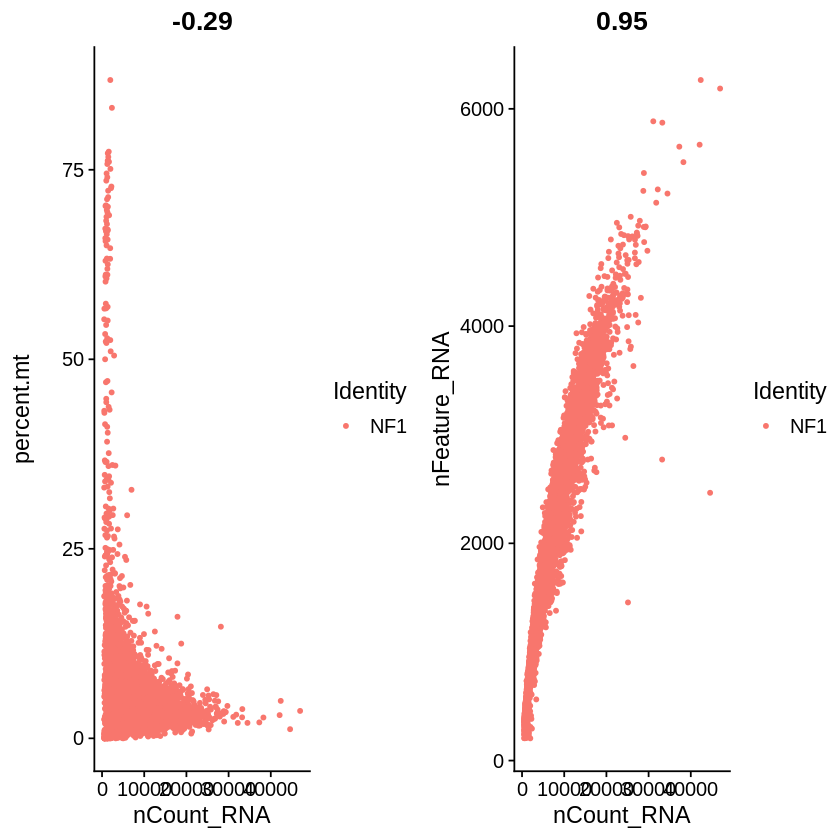

In [9]:
plot1 <- FeatureScatter(NF1, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(NF1, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

In [10]:
NF1 <- subset(NF1, subset = nFeature_RNA > 1000 & nFeature_RNA < 6000 & percent.mt < 15)

In [11]:
NF1

An object of class Seurat 
20350 features across 6541 samples within 1 assay 
Active assay: RNA (20350 features)

In [12]:
NF1 <- NormalizeData(NF1, normalization.method = "LogNormalize", scale.factor = 10000)
NF1 <- FindVariableFeatures(NF1, selection.method = "vst", nfeatures = 2000)
NF1 <- ScaleData(NF1, verbose = FALSE)
NF1 <- RunPCA(NF1, npcs = 30, verbose = FALSE)
NF1 <- RunUMAP(NF1, reduction = "pca", dims = 1:15)
NF1 <- FindNeighbors(NF1, dims = 1:15)
NF1 <- FindClusters(NF1, resolution = 0.5)
NF1 <- RunTSNE(object = NF1, dims.use = 1:15, do.fast = TRUE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”13:06:47 UMAP embedding parameters a = 0.9922 b = 1.112
13:06:47 Read 6541 rows and found 15 numeric columns
13:06:47 Using Annoy for neighbor search, n_neighbors = 30
13:06:47 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
13:06:49 Writing NN index file to temp file /tmp/Rtmpey70Sa/file211146f44c31d
13:06:49 Searching Annoy index using 1 thread, search_k = 3000
13:06:52 Annoy recall = 100%
13:06:52 Commencing smooth kNN distance calibration using 1 thread
13:06:53 Initializing from normalized Laplacian + noise
13:06:54 Commencing optimizati

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6541
Number of edges: 211282

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9089
Number of communities: 14
Elapsed time: 0 seconds



********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

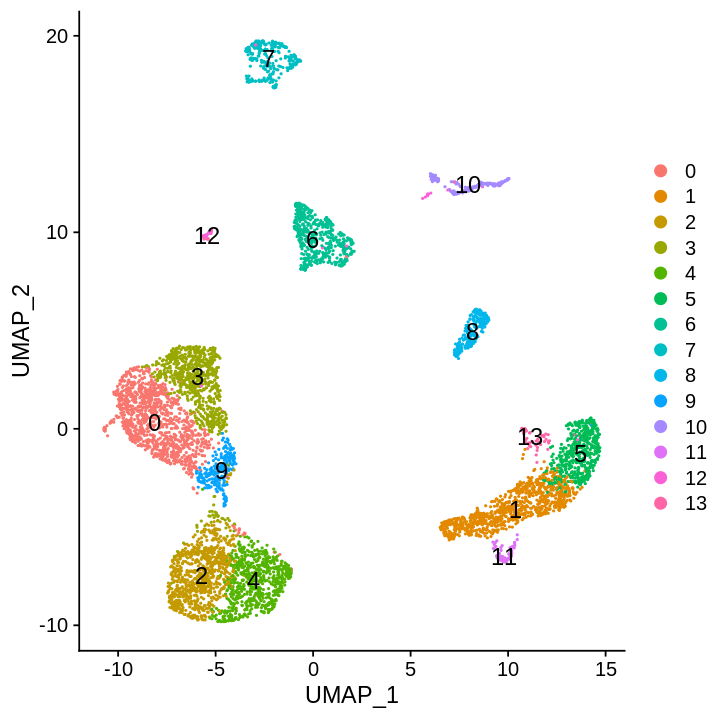

In [13]:
library(cowplot)
options(repr.plot.width=6,repr.plot.height=6)
DimPlot(NF1, reduction = "umap",label = T,label.size = 5)

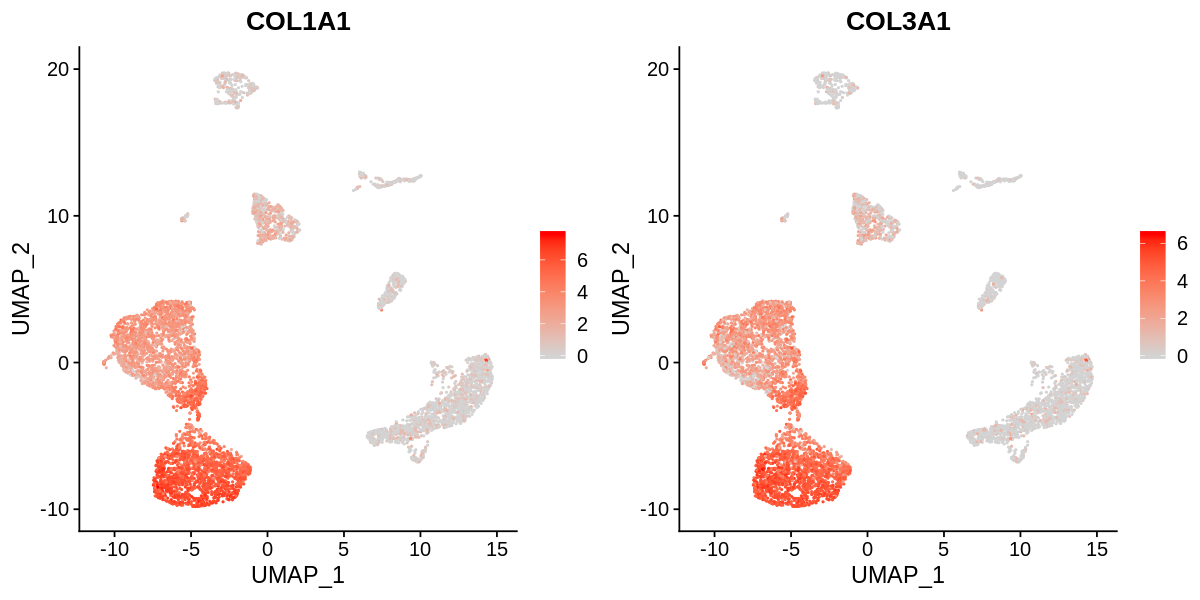

In [14]:
#fibroblast
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(NF1, features = c("COL1A1","COL3A1"),nc=2,cols=c("lightgrey", "red"))

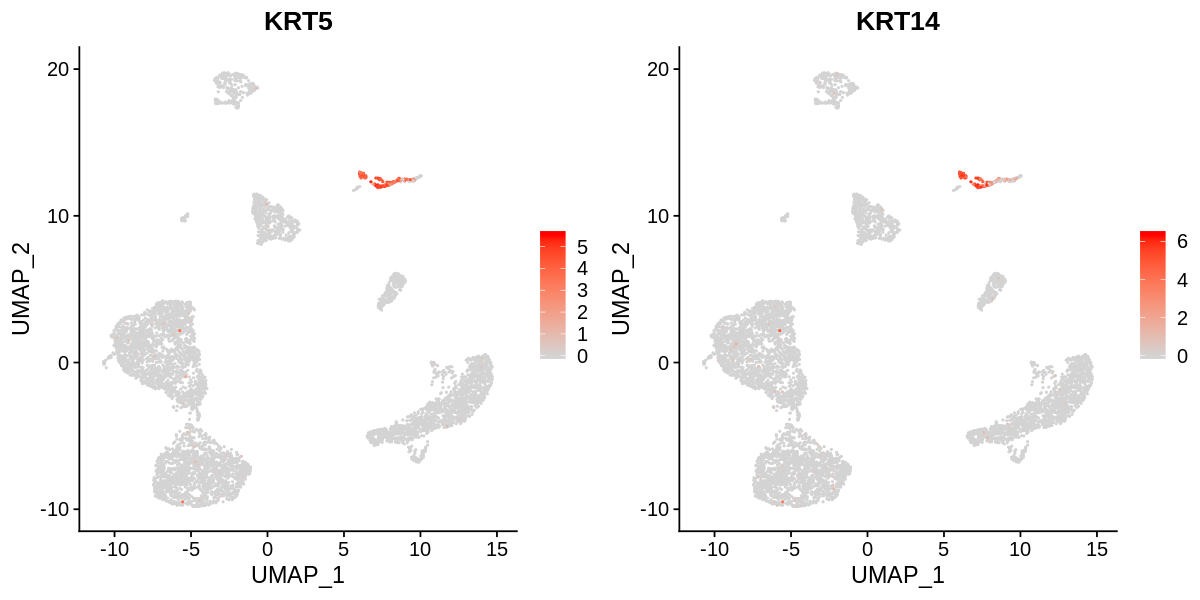

In [15]:
#basal cell (keratinocytes)
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(NF1, features = c("KRT5", "KRT14"),cols=c("lightgrey", "red"))

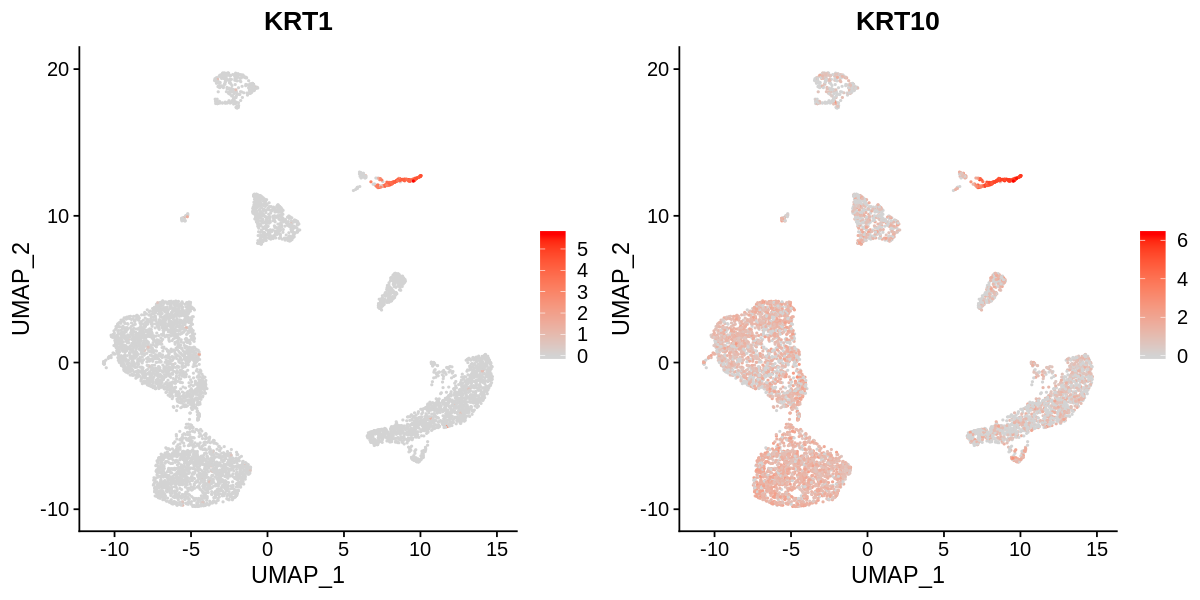

In [16]:
#keratinocytes spinous_cell
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(NF1, features = c("KRT1", "KRT10"),cols=c("lightgrey", "red"))

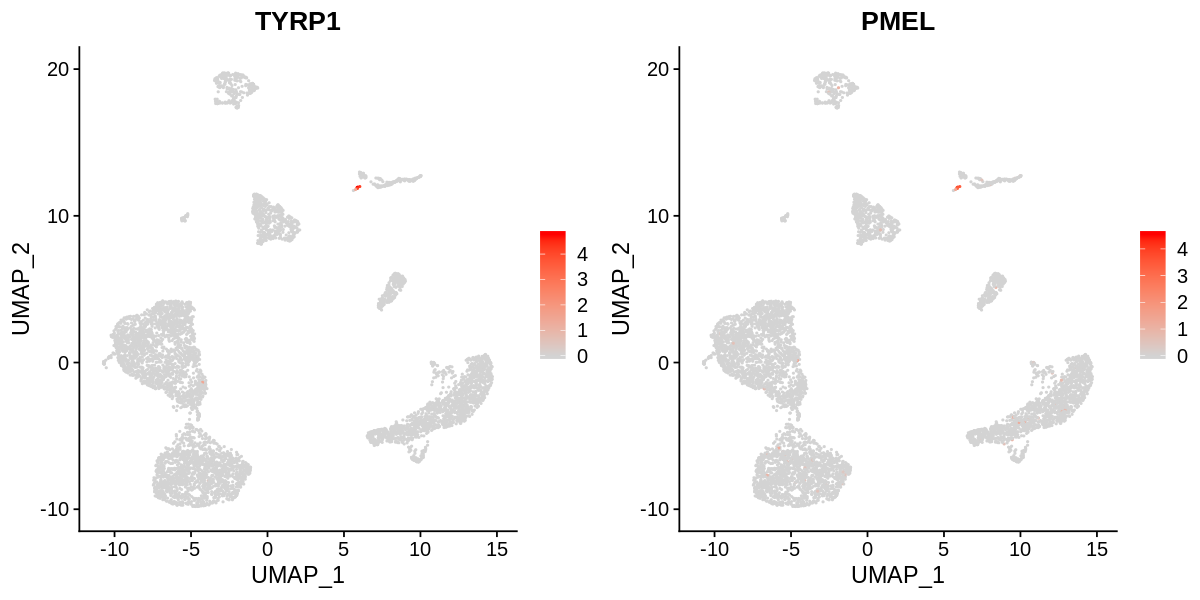

In [17]:
#Melanocytes
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(NF1, features = c("TYRP1", "PMEL"),cols=c("lightgrey", "red"))

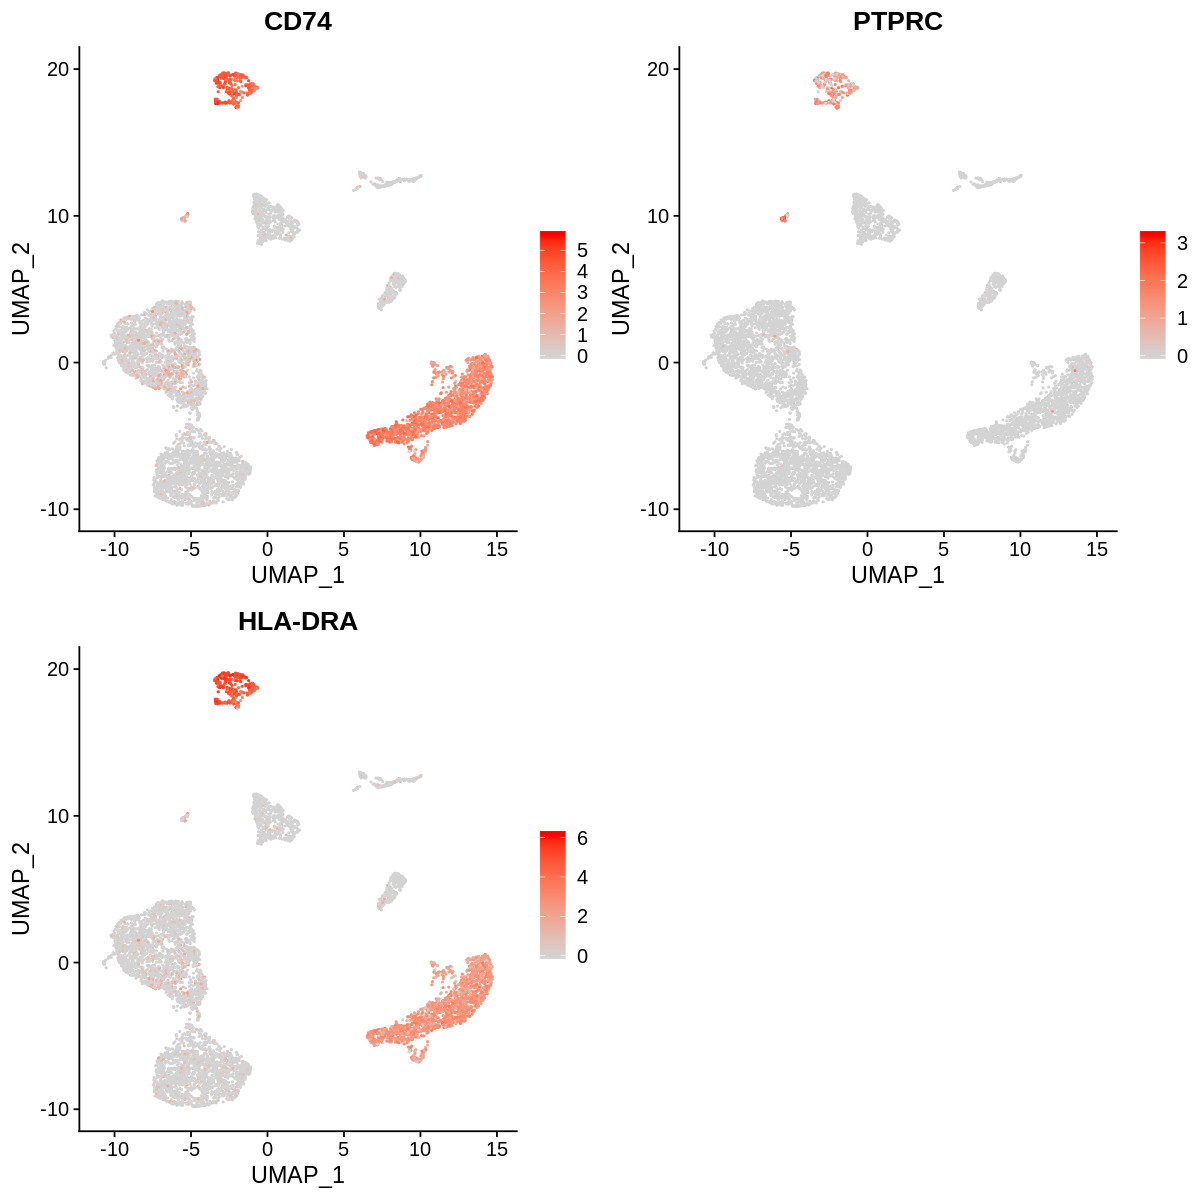

In [18]:
#immune
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(NF1, features = c("CD74", "PTPRC","HLA-DRA"),cols=c("lightgrey", "red"))

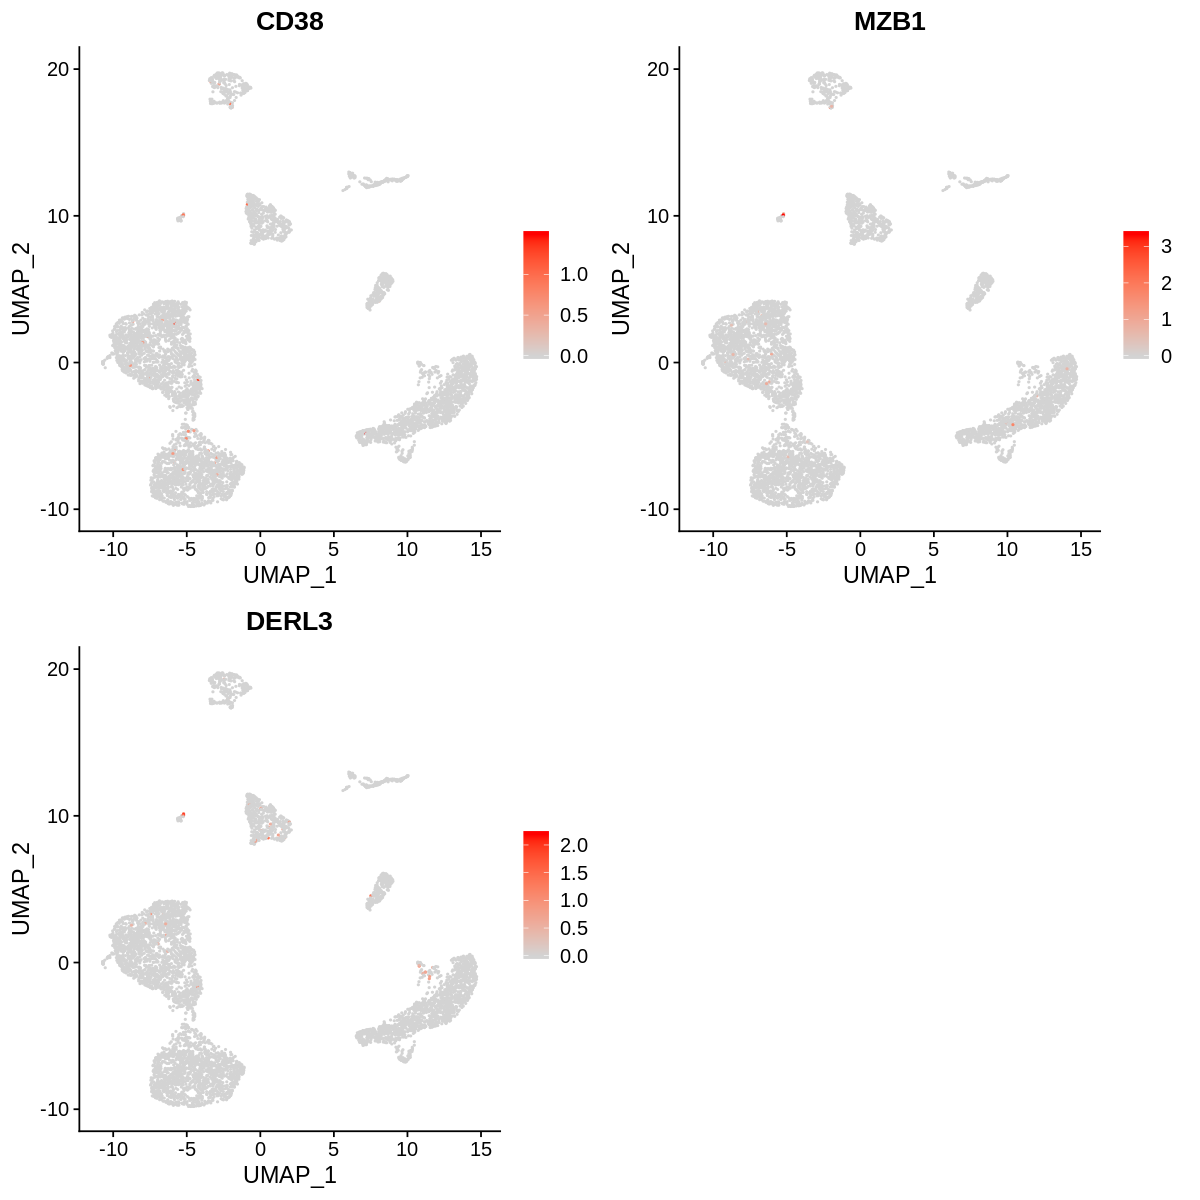

In [19]:
#immune B
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(NF1, features = c("CD38","MZB1","DERL3"),cols=c("lightgrey", "red"))

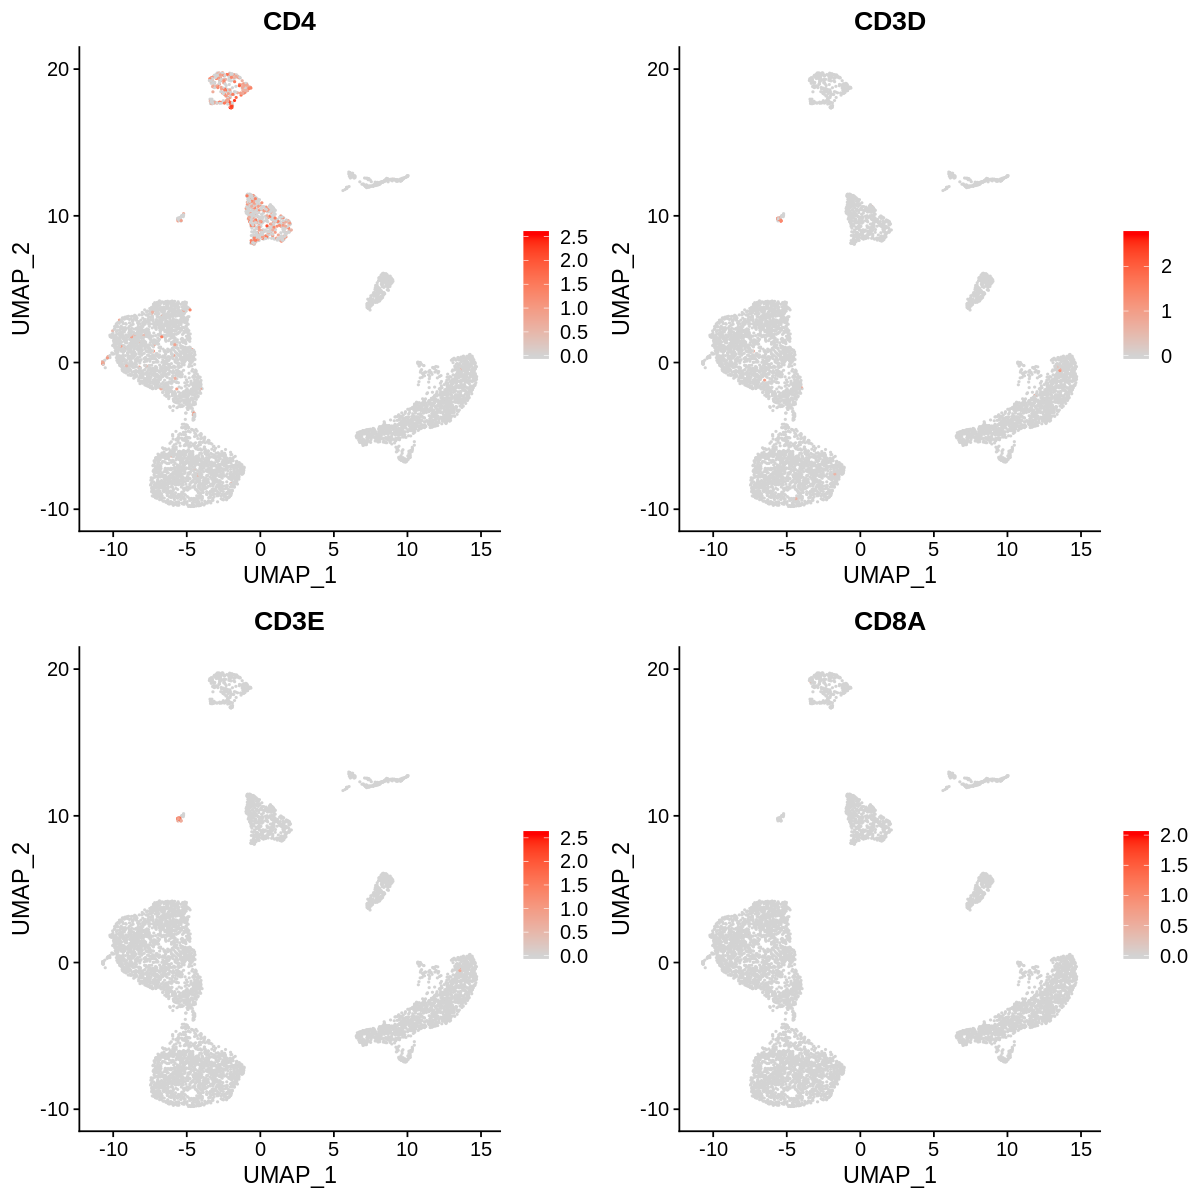

In [20]:
#immune T
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(NF1, features = c("CD4","CD3D","CD3E","CD8A"),cols=c("lightgrey", "red"))

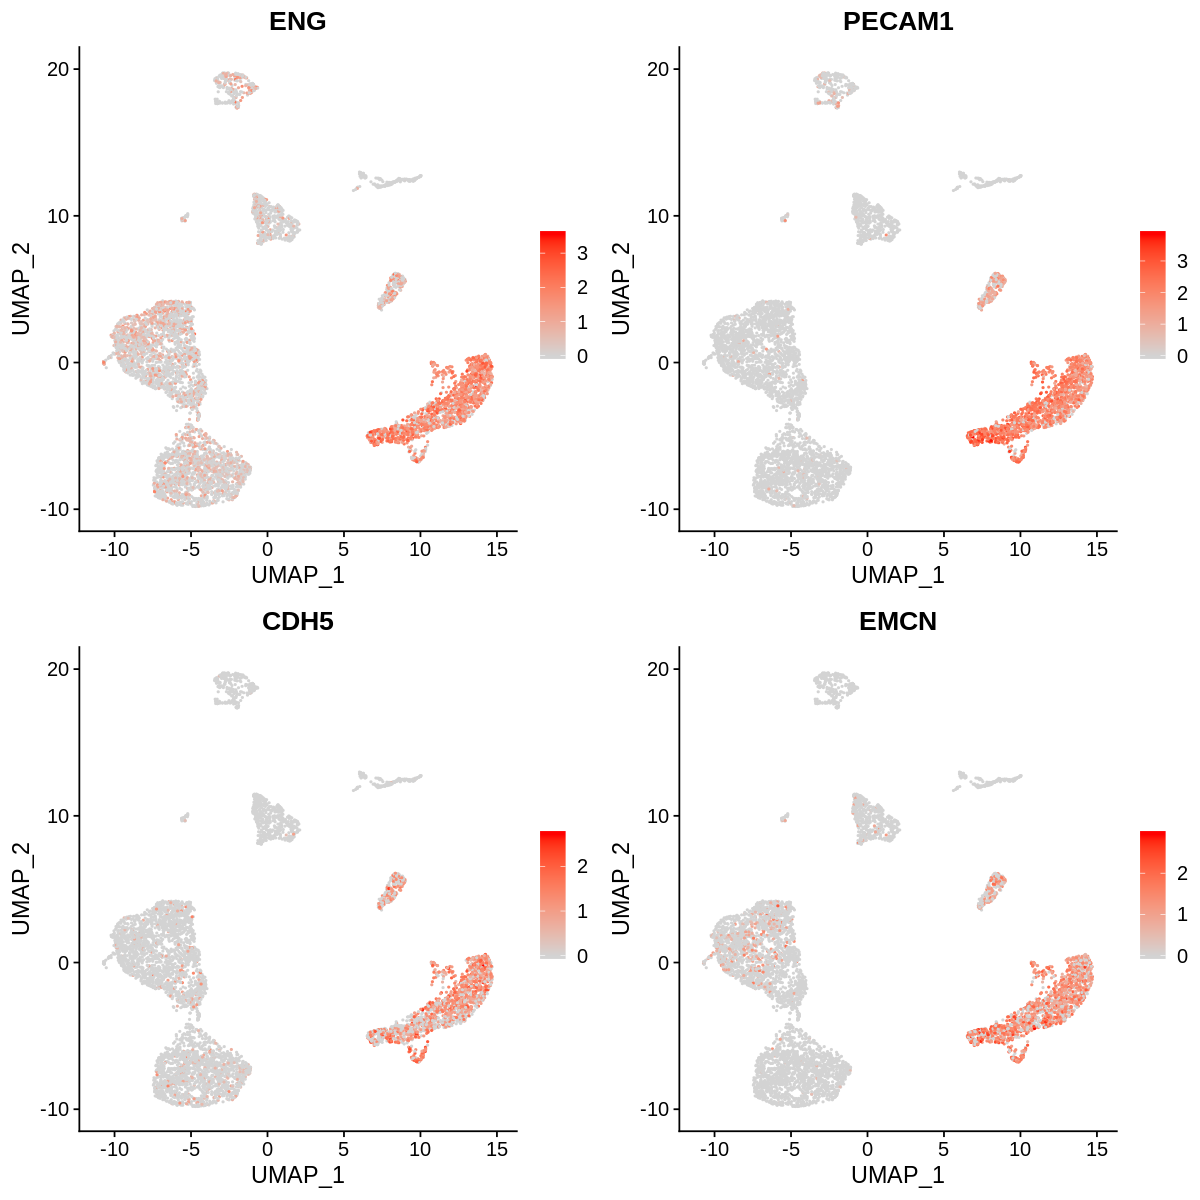

In [21]:
#endothelial cells
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(NF1, features = c("ENG","PECAM1","CDH5","EMCN"),cols=c("lightgrey", "red"))

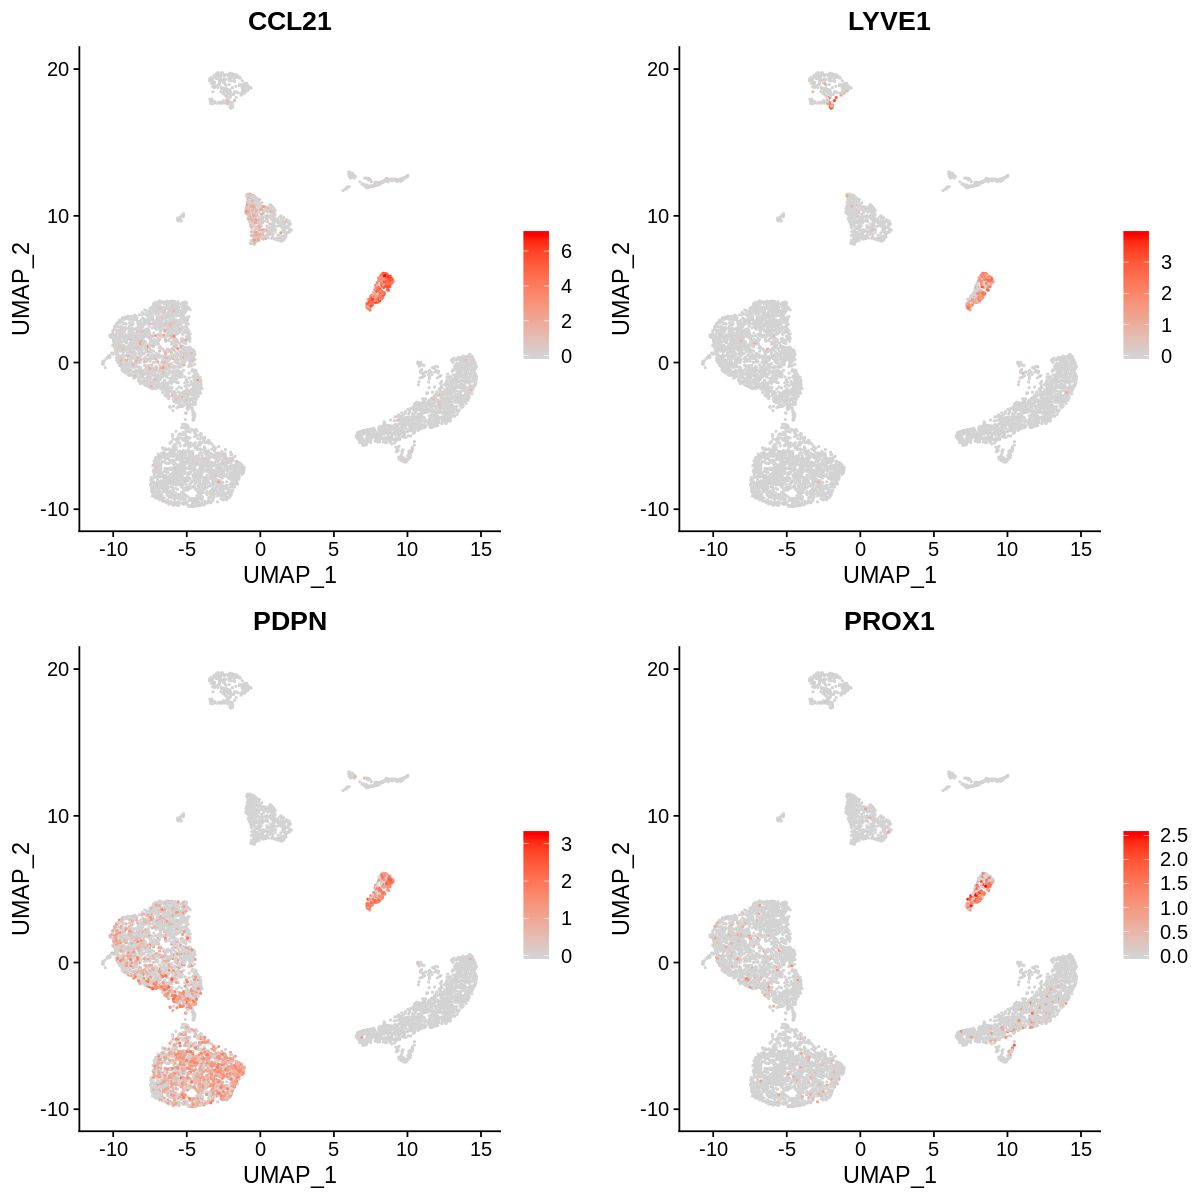

In [22]:
#lymphatic endothelial marker
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(NF1, features = c("CCL21","LYVE1","PDPN","PROX1"),cols=c("lightgrey", "red"))

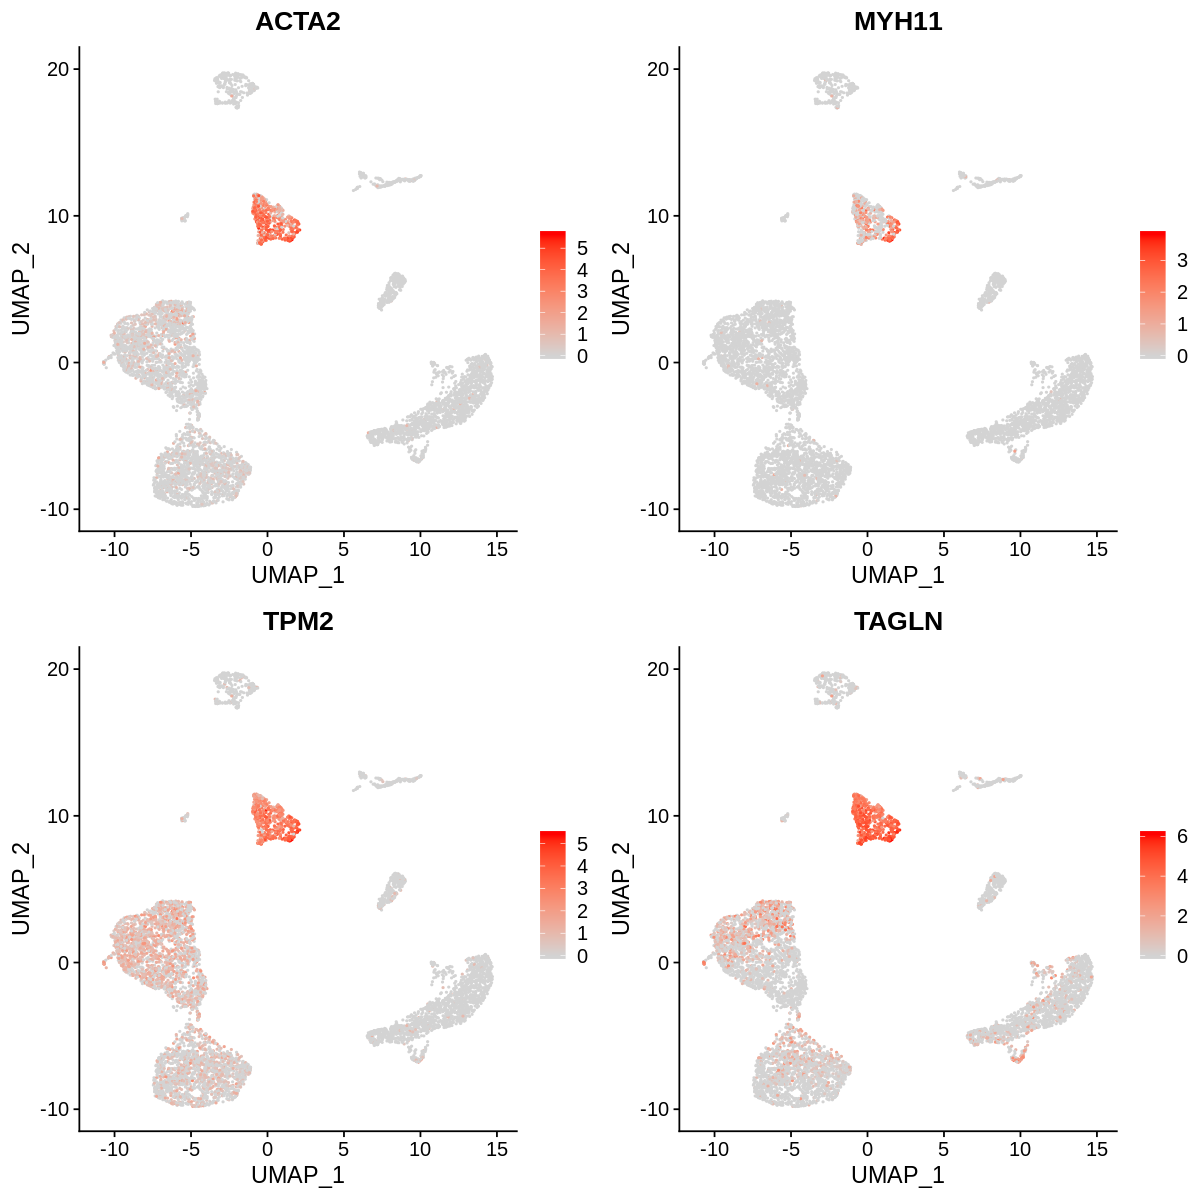

In [23]:
#muscle fiber marker
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(NF1, features = c("ACTA2","MYH11","TPM2","TAGLN"),cols=c("lightgrey", "red"))

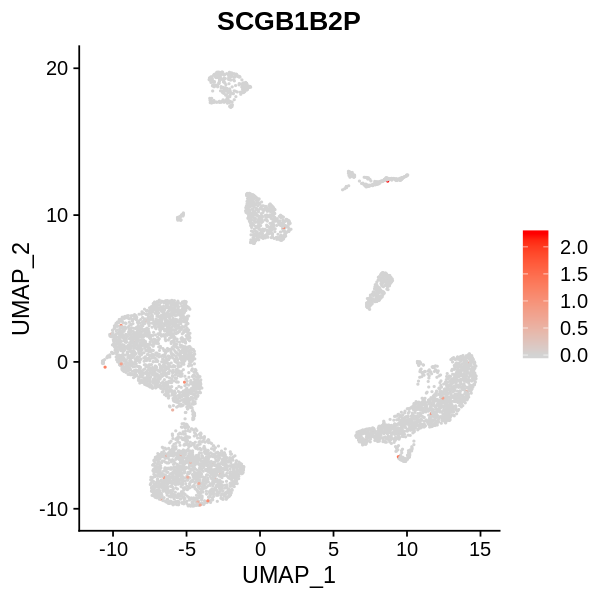

In [24]:
#secretory (glandular) cells
options(repr.plot.width=5,repr.plot.height=5)
FeaturePlot(NF1, features = c("SCGB1B2P"),cols=c("lightgrey", "red"))

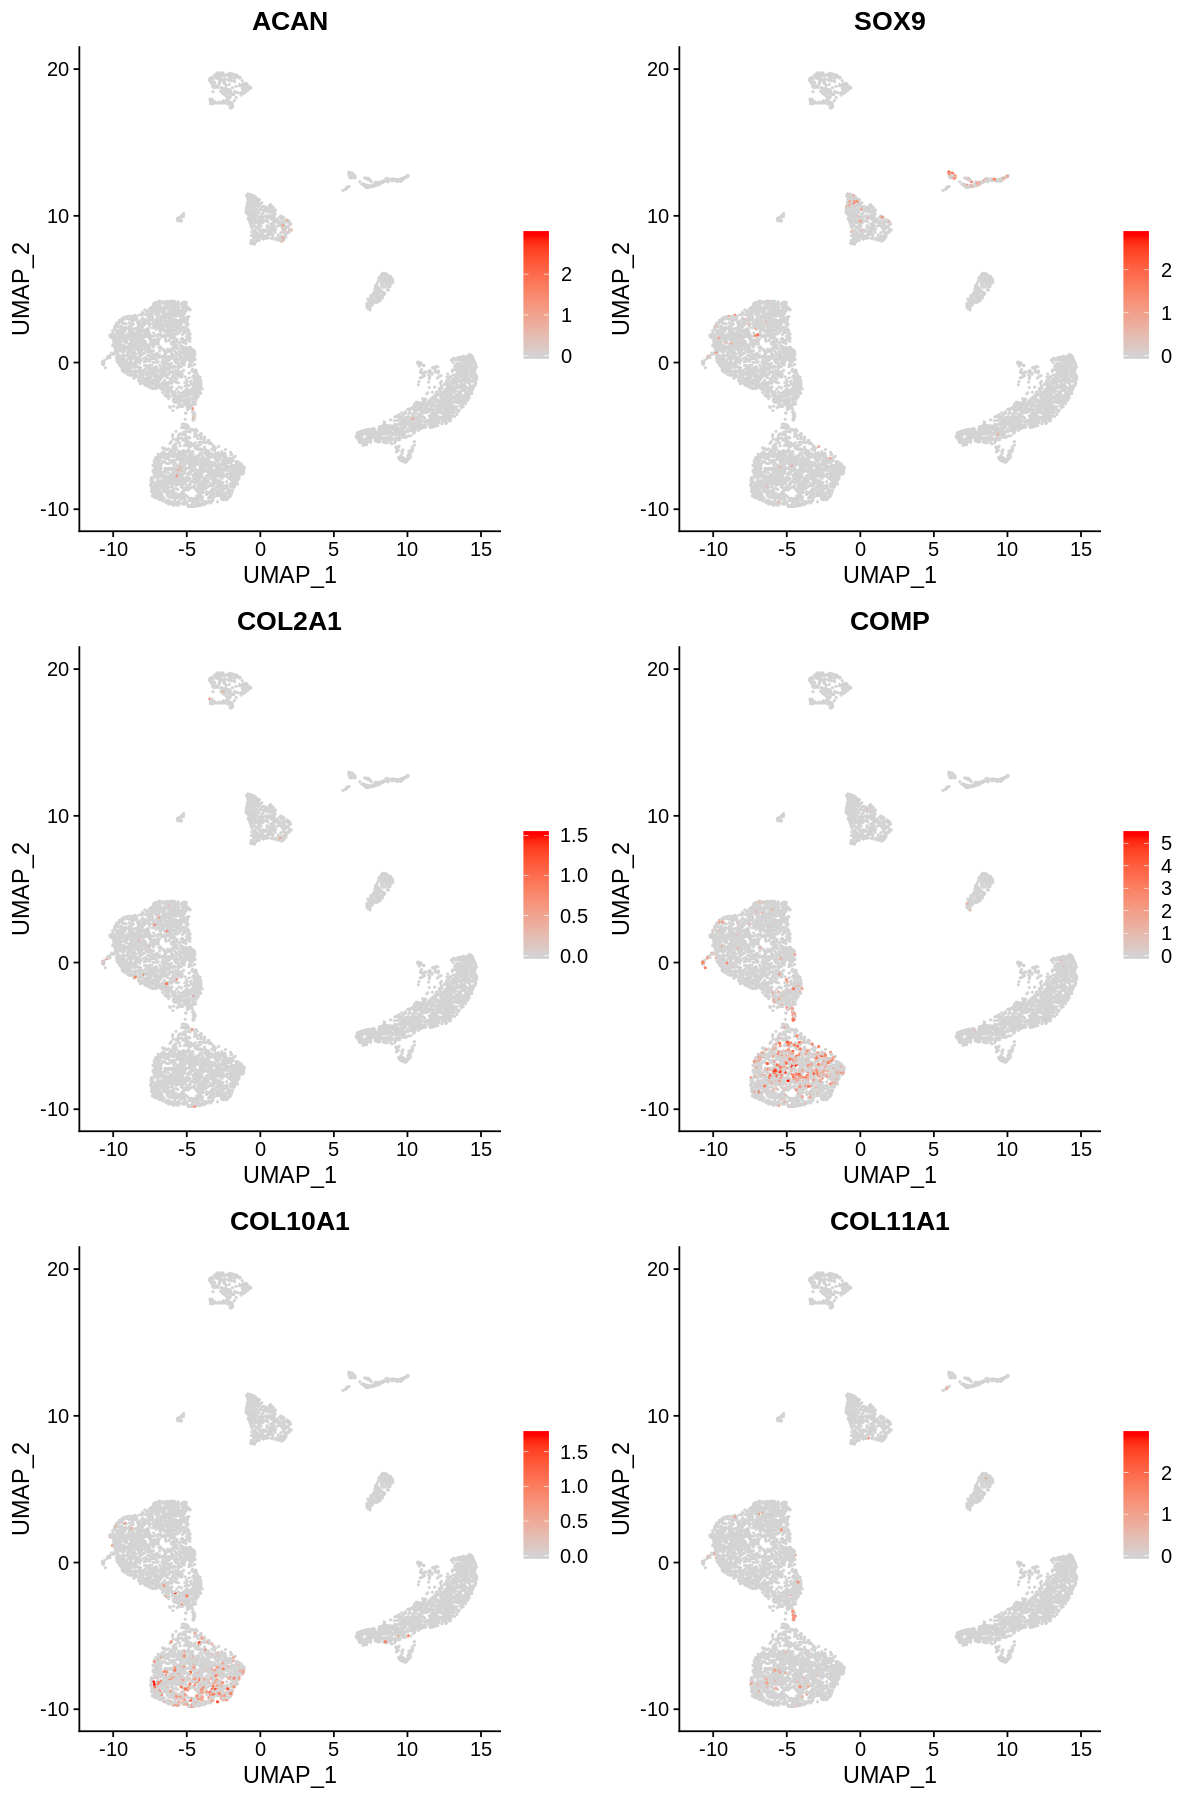

In [25]:
options(repr.plot.width=10,repr.plot.height=15)
FeaturePlot(NF1, features = c("ACAN","SOX9","COL2A1","COMP","COL10A1","COL11A1"),nc=2,cols=c("lightgrey", "red"))

In [26]:
dim(NF1)
NF1$dataset=rep("NF1",ncol(NF1))

[1] 20350  6541

In [28]:
table(Idents(NF1))


   0    1    2    3    4    5    6    7    8    9   10   11   12   13 
1088  933  818  755  703  543  519  290  249  237  212   68   64   62 

In [31]:
NF1.fib=subset(NF1,idents = c("0","2","3","4","9"))

In [32]:
NF1.fib

An object of class Seurat 
20350 features across 3601 samples within 1 assay 
Active assay: RNA (20350 features)
 3 dimensional reductions calculated: pca, umap, tsne

In [33]:
setwd("/mnt/dfc_data1/project/hobart/hospital/scRNAseq_keloid/allSample/NF1")

In [35]:
save(NF1,file="NF1.seurat.object.Rdata")

In [34]:
save(NF1.fib,file="NF1.fib.seurat.object.Rdata")

# #####################################################

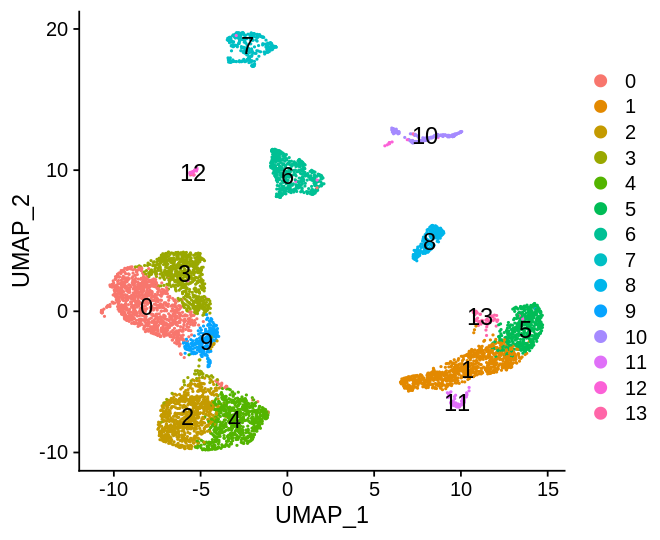

In [36]:
library(cowplot)
options(repr.plot.width=5.5,repr.plot.height=4.5)
DimPlot(NF1, reduction = "umap",label = T,label.size = 5)

In [38]:
new.cluster.id=c("Fibroblast","Endothelial","Fibroblast","Fibroblast","Fibroblast","Endothelial","muscle_fiber","Immune_cell","Lymphatic_endothelial","Fibroblast","Keratinocyte","Endothelial","Immune_cell","Endothelial")
names(new.cluster.id)=levels(NF1)
NF1=RenameIdents(NF1,new.cluster.id)

In [39]:
table(Idents(NF1))


           Fibroblast           Endothelial          muscle_fiber 
                 3601                  1606                   519 
          Immune_cell Lymphatic_endothelial          Keratinocyte 
                  354                   249                   212 

In [40]:
write.csv(table(Idents(NF1)),"NF1.cluster_cellType_Statis.csv")

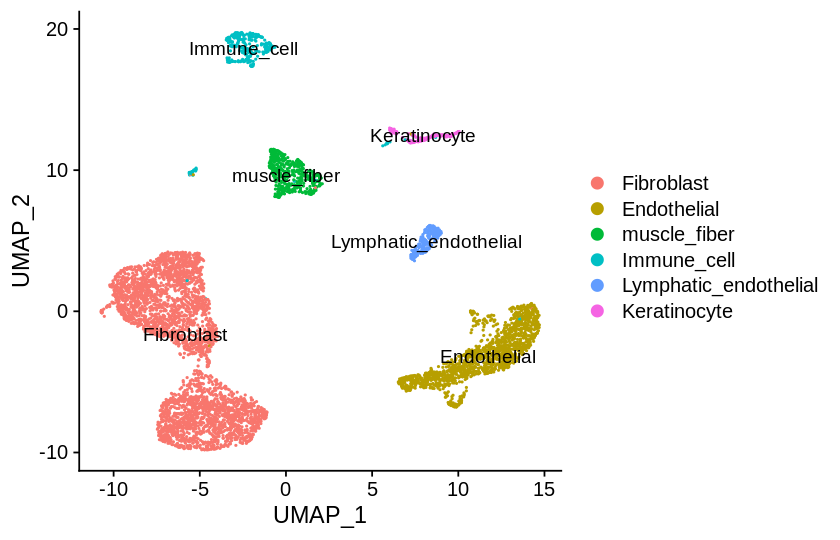

In [41]:
library(cowplot)
options(repr.plot.width=7,repr.plot.height=4.5)
DimPlot(NF1, reduction = "umap",label = T,label.size = 4)